This following A Karpathy's "The spelled-out intro to neural networks and backpropagation: building micrograd" from YouTube: https://www.youtube.com/watch?v=VMj-3S1tku0

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h=0.0001

a=2.0
b=-3.0
c=10.0

d1=a*b+c
c+=h
d2=a*b+c

print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [12]:
class Value:
    def __init__(self,data,_children=(),_op='',label='') -> None:
        self.data=data
        self._prev=set(_children)
        self._op=_op
        self.label=label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out=Value(self.data+other.data,(self,other),'+')
        return out
    
    def __mul__(self,other):
        out=Value(self.data*other.data,(self,other),'*')
        return out
    
a=Value(2.0,label='a')
b=Value(-3.0,label='b')
c=Value(10.0,label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f=Value(-2.0,label='f')
L=d*f; L.label='L'
L


Value(data=-8.0)

In [13]:
from graphviz import Digraph

def trace(root):
    nodes, edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot=Digraph(format='svg',graph_attr={'rankdir': 'LR'}) #LR = left to Right

    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        # create a rectangular 'record' node
        dot.node(name=uid,label="{%s | data %.2f}" % (n.label,n.data),shape='record')
        if n._op:
            # create an op node
            dot.node(name=uid + n._op,label=n._op)
            # connect node to it
            dot.edge(uid+n._op,uid)
    
    for n1,n2 in edges:
        # connect n1 to op node n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    
    return dot


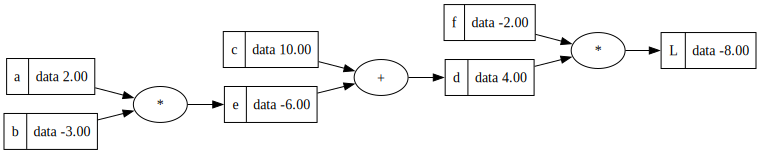

In [15]:
draw_dot(L)